In [13]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import h5py
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [14]:
np.random.seed(0)

In [15]:
train_path='plant_images/train'
valid_path='plant_images/valid'
test_path='plant_images/test'
class_list=['SpeciesA','SpeciesB','SpeciesC']

In [32]:
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(train_path,target_size=(224,224),class_mode='categorical',batch_size=30)
test_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,target_size=(224,224),class_mode='categorical',batch_size=4)
valid_batches=ImageDataGenerator(rescale=1./255).flow_from_directory(valid_path,target_size=(224,224),class_mode='categorical',batch_size=30)


Found 422 images belonging to 3 classes.
Found 62 images belonging to 3 classes.
Found 197 images belonging to 3 classes.


In [33]:
def plots(ims,figsize=(10,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ins=np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
        plt.imshow(ims[i],interpolation=None)

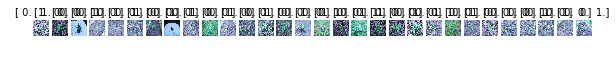

In [34]:
imgs,labels=next(train_batches)
plots(imgs,titles=labels)

In [35]:
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=3, input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))

model.add(Conv2D(filters=1024,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.1))

#model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(3,activation='softmax'))
model.summary()

opt=Adam(lr=.0001)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_65 (Dropout)         (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 109, 109, 512)     295424    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 54, 54, 512)       0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 54, 54, 512)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 52, 52, 128)       589952    
__________

In [37]:
history=model.fit_generator(train_batches,steps_per_epoch=4, nb_epoch=100
                            ,validation_data=valid_batches,validation_steps=4, verbose=2)

/home/abir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/home/abir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=4, validation_data=<keras_pre..., validation_steps=4, verbose=2, epochs=100)`
  


Epoch 1/100
 - 102s - loss: 1.0861 - acc: 0.3250 - val_loss: 1.0921 - val_acc: 0.3583
Epoch 2/100
 - 70s - loss: 1.0615 - acc: 0.4519 - val_loss: 1.0778 - val_acc: 0.4766
Epoch 3/100
 - 89s - loss: 1.0736 - acc: 0.3750 - val_loss: 1.0835 - val_acc: 0.3583
Epoch 4/100
 - 83s - loss: 1.0850 - acc: 0.3667 - val_loss: 1.0776 - val_acc: 0.3738
Epoch 5/100
 - 79s - loss: 1.1136 - acc: 0.3167 - val_loss: 1.0847 - val_acc: 0.3833
Epoch 6/100
 - 64s - loss: 1.0596 - acc: 0.3939 - val_loss: 1.0839 - val_acc: 0.4019
Epoch 7/100
 - 70s - loss: 1.0652 - acc: 0.4000 - val_loss: 1.0812 - val_acc: 0.3925
Epoch 8/100
 - 77s - loss: 1.0699 - acc: 0.4000 - val_loss: 1.0755 - val_acc: 0.4083
Epoch 9/100
 - 74s - loss: 1.0757 - acc: 0.3667 - val_loss: 1.0825 - val_acc: 0.3551
Epoch 10/100
 - 67s - loss: 1.0447 - acc: 0.3851 - val_loss: 1.0553 - val_acc: 0.4250
Epoch 11/100
 - 69s - loss: 1.0532 - acc: 0.4583 - val_loss: 1.0681 - val_acc: 0.3738
Epoch 12/100
 - 76s - loss: 1.0871 - acc: 0.3583 - val_loss: 1

Epoch 97/100
 - 75s - loss: 0.7432 - acc: 0.6833 - val_loss: 0.8221 - val_acc: 0.5701
Epoch 98/100
 - 75s - loss: 0.8397 - acc: 0.6000 - val_loss: 0.8841 - val_acc: 0.5607
Epoch 99/100
 - 77s - loss: 0.7295 - acc: 0.6250 - val_loss: 0.8297 - val_acc: 0.5583
Epoch 100/100
 - 67s - loss: 0.7318 - acc: 0.6591 - val_loss: 0.7981 - val_acc: 0.6168


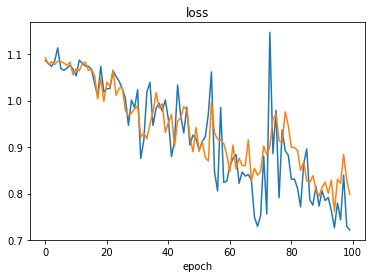

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')

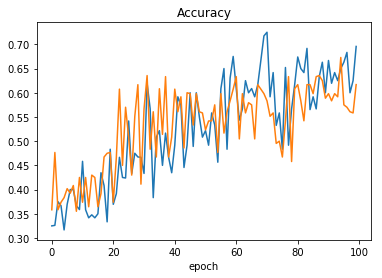

In [39]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

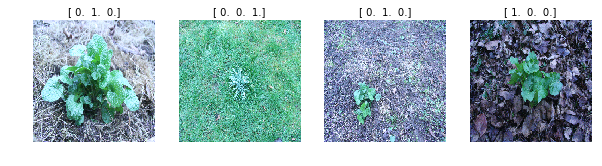

In [46]:
test_imgs,test_labels=next(test_batches)
plots(test_imgs,titles=test_labels)

In [44]:
pred=model.predict_generator(test_batches,steps=1)

In [45]:
pred

array([[ 0.06223736,  0.69938016,  0.23838256],
       [ 0.37808007,  0.21649249,  0.40542743],
       [ 0.65463835,  0.04939947,  0.29596215],
       [ 0.2064389 ,  0.38926205,  0.40429911]], dtype=float32)

TypeError: 'tuple' object is not callable

In [ ]:
cm